In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
#데이터를 불러온다

red = pd.read_csv('/content/winequality-red.csv',sep = ';')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')


In [ ]:
display(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
display(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#red와 white의 변수가 같으니 하나로 합치는 것이 좋을 것 같다.
#하지만 하나로 합치려면 red와 white의 구분이 어려울수도 있기 때문에
#뒤에 type을 추가해 주자

In [ ]:
red['type']   = 0
white['type'] = 1

In [ ]:
print(red.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]


In [ ]:
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


In [ ]:
#하나로 합치기
wine = pd.concat([red, white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


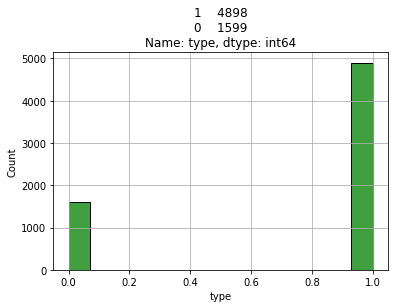

In [ ]:
#평균값을 보니 0.5가 아니라 0.75이다.
# 한쪽으로 쏠려있는지 확인해본다.

sns.histplot(wine['type'], color = 'green')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()
#type, 즉 red와 white의 비율을 볼 수 있다.

In [ ]:
#데이터를 섞어준다. 마지막 종속변수가 한쪽으로 쏠릴수도있기 때문, 기타 등등
wine[:30]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [ ]:
#섞어준다.
wine_shuffle = wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
4418            6.6              0.22         0.23  ...     8.80        6     1
486            10.2              0.67         0.39  ...    10.00        5     0
4763            5.3              0.40         0.25  ...    11.75        7     1
510            12.4              0.42         0.49  ...     9.50        5     0
1566            6.7              0.16         0.64  ...    11.20        6     0

[5 rows x 13 columns]


In [ ]:
#넘파이화
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [ ]:
print("Total dataset index : " , len(wine_np))
train_idx = int(len(wine_np) * 0.8)
print("Train dataset index : ", train_idx)

Total dataset index :  6497
Train dataset index :  5197


In [ ]:
train_X, train_Y =  wine_np[ : train_idx,  : -1], wine_np[ : train_idx,  -1]
test_X, test_Y   =  wine_np[ train_idx : , : -1], wine_np[ train_idx : , -1]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
#학습과 테스트가 잘 쪼개진 것을 볼 수 있다.

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [ ]:
train_X[0]

array([6.6000e+00, 2.2000e-01, 2.3000e-01, 1.7300e+01, 4.7000e-02,
       3.7000e+01, 1.1800e+02, 9.9906e-01, 3.0800e+00, 4.6000e-01,
       8.8000e+00, 6.0000e+00])

In [ ]:
print("\nBefore - to_categorical : \n")

print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

#red와 white를 카테고리로 구분하자.

train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes=2)


test_Y_to_categorical_5  = tf.keras.utils.to_categorical(test_Y, num_classes = 5)

print("\nAfter - to_categorical : \n")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

print("\nAfter - to_categorical_5 : \n")
print(test_Y_to_categorical_5[:3])


Before - to_categorical : 

1.0
0.0
1.0

After - to_categorical : 

[0. 1.]
[1. 0.]
[0. 1.]

After - to_categorical_5 : 

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
# 마지막 와인의 종류를 원핫벡터화 해줬다. 
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


In [ ]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape= (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units= 2, activation='sigmoid')
])

In [ ]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [ ]:
model_swish_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs = 25, batch_size = 24,
                                  validation_split = 0.2, 
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3,
                                                                                monitor='val_loss')])

Epoch 1/25
174/174 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0594 - val_accuracy: 0.9817
Epoch 2/25
174/174 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9774 - val_loss: 0.0558 - val_accuracy: 0.9856
Epoch 3/25
174/174 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9738 - val_loss: 0.0658 - val_accuracy: 0.9856
Epoch 4/25
174/174 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0374 - val_accuracy: 0.9875
Epoch 5/25
174/174 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9796 - val_loss: 0.0630 - val_accuracy: 0.9769
Epoch 6/25
174/174 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0792 - val_accuracy: 0.9760
Epoch 7/25
174/174 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9769 - val_loss: 0.0576 - val_accuracy: 0.9846


In [ ]:
#한쪽으로 치우쳐진 변수에 대해서 acc를 챙겨가게 된다. 

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

In [ ]:
val_loss = history.history['val_loss']
loss     = history.history['loss']

In [ ]:
print(val_accuracy)
print(accuracy)

[0.9817307591438293, 0.9855769276618958, 0.9855769276618958, 0.987500011920929, 0.9769230484962463, 0.9759615659713745, 0.9846153855323792]
[0.9785903096199036, 0.977387547492981, 0.9737791419029236, 0.9814770221710205, 0.9795525670051575, 0.9814770221710205, 0.976906418800354]


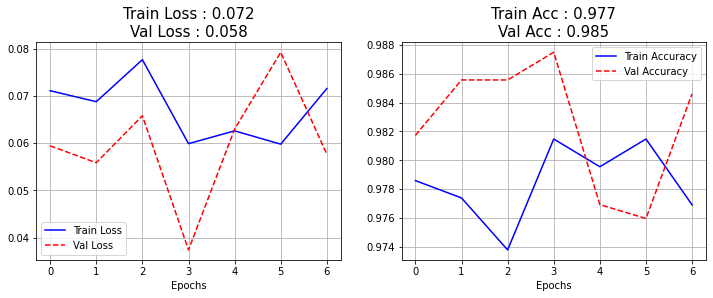

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
#붉은색은 검증된 손실값?
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)


plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()


In [ ]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9792


[0.0800148993730545, 0.9792307615280151]

In [ ]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20], 2))

#[첫번째 유닛의 값,두번째 유닛의 값]
#이진분류는 0과1인데, 이걸로 어떻게 학습을 시킬까??
#경사하강법으로 하는 학습도 있지만, 손실함수를 구하려고하니..
#실제값이 1이고 예측값이 0, 실제값이 0이고 예측값이 1 일때..불가
#확률분포자체를 학습시킨다?!

[[1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.02 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [1.   0.  ]
 [0.53 0.63]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.54 0.63]
 [0.   1.  ]
 [1.   0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.11 0.93]
 [0.   1.  ]]


In [ ]:
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
